# **Boston House Price Prediction**

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided**. In the process, I  need to **identify the most important features affecting the price of the house**. I need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
%config InlineBackend.figure_formats = ['svg']

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#  Model building
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
df = pd.read_csv("Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observation:**

* The price of the house indicated by the variable MEDV is the target variable and the rest of the variables are independent variables based on which we will predict the house price (MEDV).

### **Checking the info of the data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

## **Exploratory Data Analysis and Data Preprocessing**

### **Summary Statistics of this Dataset**

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**

- CRIM, ZN, DIS, LSTAT vary quite heavely. There could be potential outliers in the data 
  or these are just extreme values in data. Also this means that there is relatively high variance in criminal rates, proportion of residential area given to lots of more than 25,000 sq. feet, distances to employment centers and proportions of low class population.  
- CHAS values are mostly zeros, and the mean is very low. So there are only few of   
  the towns which located near the river. But probably this feature has significant influence on the prices. 
- from AGE we can see that most of the buildings were built before 1940 with mean/median   = 68.57/77.50 
- All other variables seem to have moderate spread
 

### **Univariate Analysis**

**Let's check the distribution of the variables**

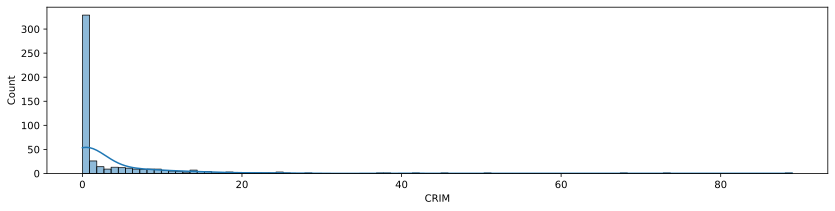

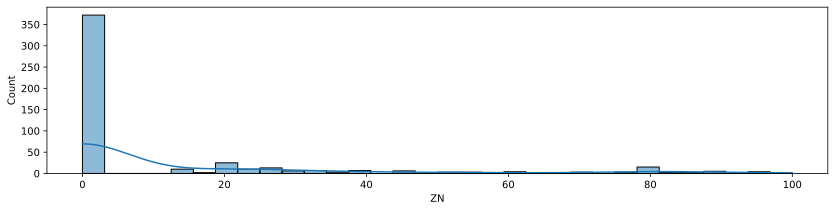

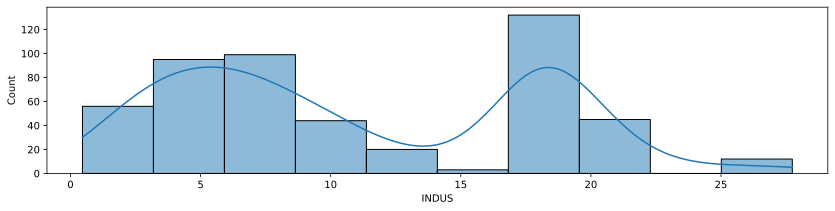

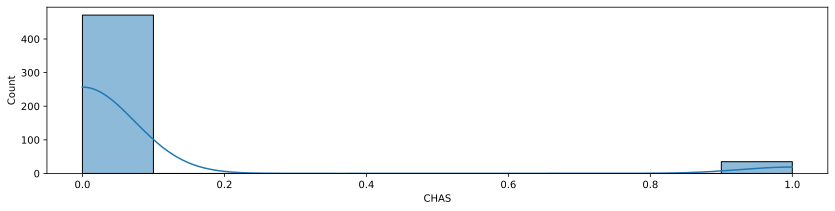

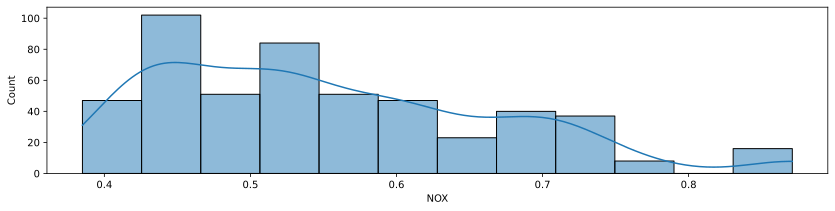

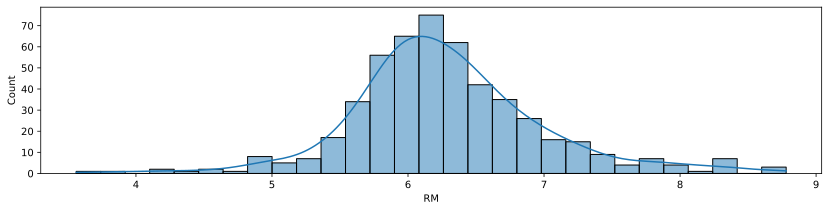

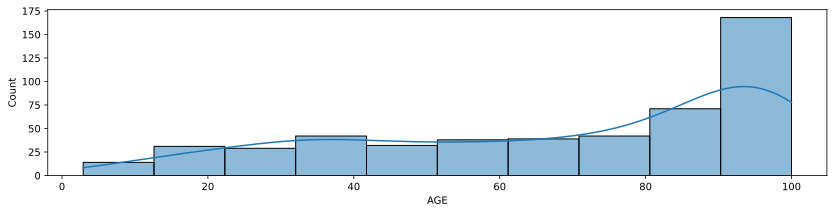

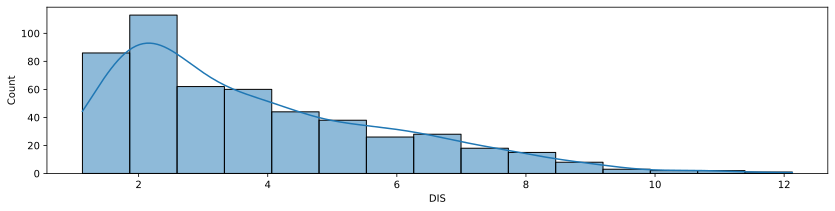

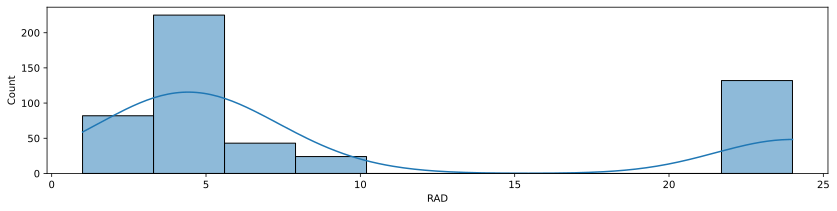

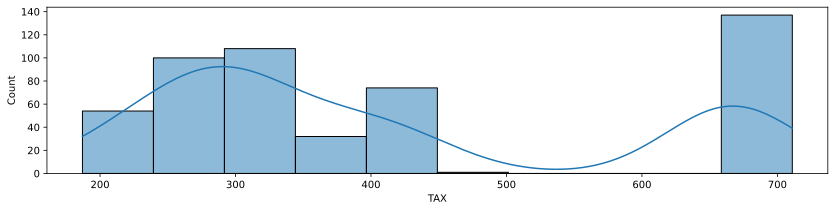

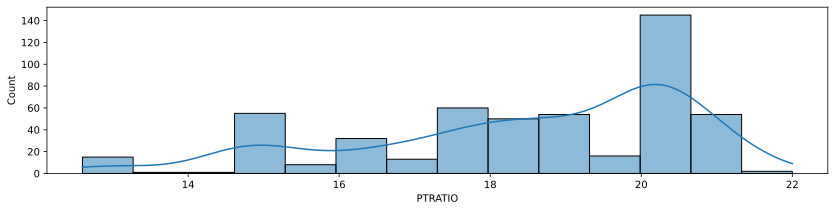

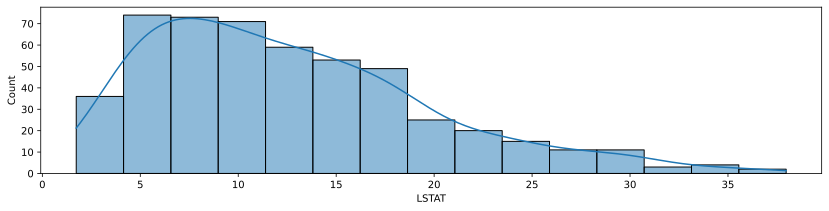

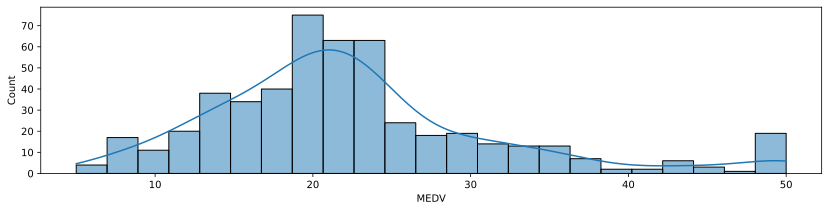

In [10]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize = (14, 3))
    sns.histplot(data = df, x = i, kde = True)
    plt.show();

**Observations:**

- CRIM rate tends to be at lower values for most of the towns, forming right skewed distribution. It falls down rather quickly to values close to zero after rate of 20. This means that there are only few towns with rather high crime rates.
- ZN has also right skewed distribution, with most of the towns having 0 residential area alocated for houses of more than 25,000 sq. feet. Which means that most of the towns populated with people leaving in small houses. There are some exceptions though with some towns populated exclusively with big houses and some cities which are partly populated with big houses and partly populated with relatively small houses. 
- INDUS seems to be bimodal gaussian mixture distribution. With modes at ~ 6 and ~ 18. This means that part of the towns tend to be at less industrial areas and some in more industrial areas and there is lower chance that a town located in an area with INDUS value away from the mode. 
- CHAS has Bernoulli distribution with most of the values at 0. So only small fraction of the towns located near riverbank
- NOX distribution looks like a mixture of gaussian and uniform with most of the values located near lower end. This means that most of the towns have relatively clean air.
- RM has gaussian distribution with mean of 6.3 rooms per house with min amount of rooms ~3 and max amount of rooms ~ 9.
- AGE distribution looks like a mixture of gaussian and uniform with left skew, which means that most of the houses were built before 1940.
- DIS is right skewed gaussian which means that most of the towns are in relatively close proximity to the employment centers.
- RAD seems to have bimodal gaussian distribution  with majority of the towns having low index of accessibility to radial highways. 
- TAX distribution seems to be bimodal gaussian with majority of the towns having below 450 tax rates. 
- PTRATIO seems to have left skewed mixture of gaussian and uniform distributions. Which means that most of the towns have relatively high  pupil/teacher ratio.
- LSTAT is right skewed gaussian, which means that most of the towns have low percentage of status people. 
- MEDV looks like slightly right skewed gaussian distribution with mean of ~ 23

As the dependent variable is slightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [11]:
df['MEDV_log'] = np.log(df['MEDV'])

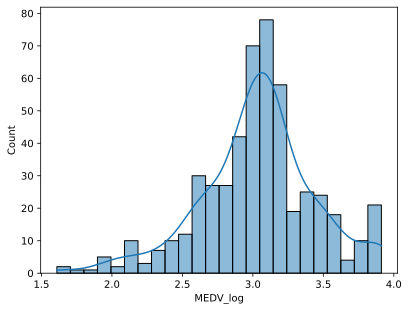

In [12]:
sns.histplot(data = df, x = 'MEDV_log', kde = True);

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without a skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

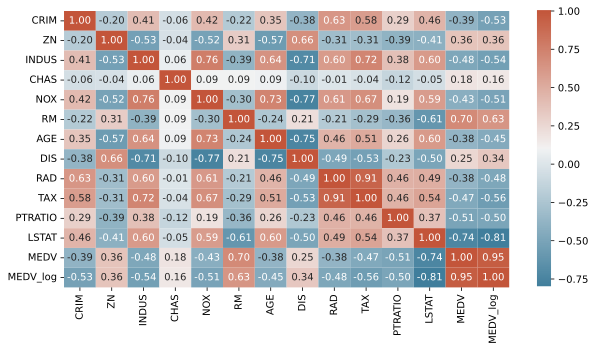

In [14]:
plt.figure(figsize = (10, 5))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show();

**Observations:**

- The highest negative correlation of MEDV_log is with LSTAT, which can mean that the most important factor for the people is a high social status of their neighbours.
- We can see that MEDV_log has a substantial negative correlation with CRIM, INDUS, NOX, AGE, RAD, TAX, PTRATIO which seems logical because the people want to live in the towns with the low crime rates, not having a noise and other negative experiences from the industrial areas, with a clean air, in the new houses, with a good accessibility to the radial higways, the low tax rates and a good amount of teachers available.
- Also there is a relatively high posititve correlation between MEDV_log and RM. Which is logical because the bigger the house the more rooms it has and the higher its price. 
- Also there is a moderate correlation between MEDV_log and ZN, DIS. That means that the higher proportion of residential zone allocated for lots higher than 25,000 sq. feet the higher the price, what is logical. Also distance to the employment centers plays important role for the house prices in the towns. 
- It's interesting that INDUS and NOX is positevely correlated with AGE. This means that towns with the older houses tend to be more industrial and have higher air pollution. 
- It's also interesting that the more industrial is the town the higher taxes are as there is a strong positive correlation.
- Another observation is that there is a strong positive correlation between taxes and accessebility to the radial highways. 
- There is a moderate positive correlation between taxes and LSTAT, which seems counter-intuitive because it seems that the higher proportion of the lower social status people the higher the taxes are, but it corresponds well to the positive correlation between INDUS and TAX. 
- There strong a positive correlation between accessibility to radial highways and criminal rate. Probably that is because the more isolated the community the lower chance of a crime is. 
- There is a moderate negative correlation between ZN and INDUS, AGE and LSTAT, which means that big houses will more likely be located in more new, less industrial towns with low proportion of lower social status people.
- CHAS has a very low correlation with all of the variables including MEDV_log, so probably this variable is not important for the analysis, unless there is a non-linear relationship to the house prices. 
- The higher the accessibility to the radial highways (RAD) the higher is NOX, which seems logical because radial highways may be a source of air pollution.
- There is a strong negative correlation between AGE and DIS, which means that the towns with older houses tend to be more away from the employment centers.
- RAD has a strong positive correlation to INDUS, which means that the more industrial towns tend to be closer to the radial highways.

Now, we will visualize the relationship between the pairs of features having significant correlations (>= 0.7 or <= -0.7).

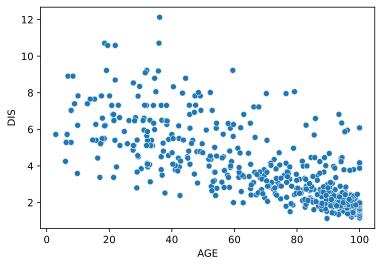

In [19]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show();

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increases in the town. It is possible that the Boston employment centers are located in the established towns where proportion of the owner-occupied units built prior to 1940 is comparatively high.

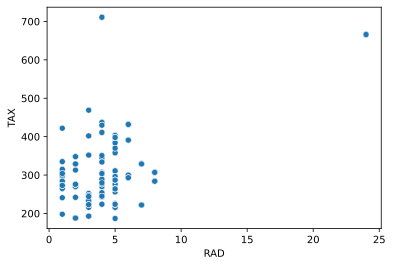

In [20]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show();

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
- The strong correlation might be due to outliers. 

Let's check the correlation after removing the outliers.

In [21]:
# Let's remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# And calculate the correlation
from scipy.stats import pearsonr
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is indeed is due to the outliers. The tax rate for some properties might be higher due to some other reason.

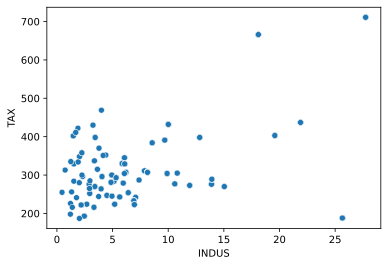

In [23]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with the increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

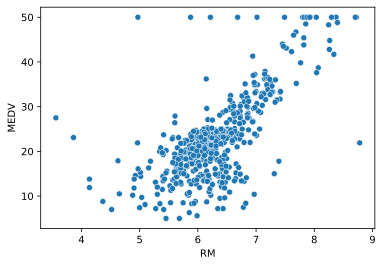

In [24]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of a house seems to increase as the value of RM increases. This is expected as the price is generally higher for houses with more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

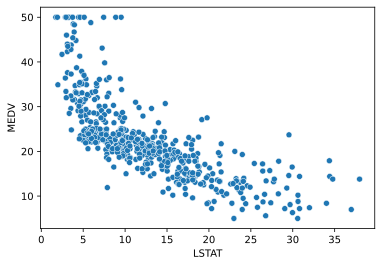

In [25]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 4))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of a house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in the areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

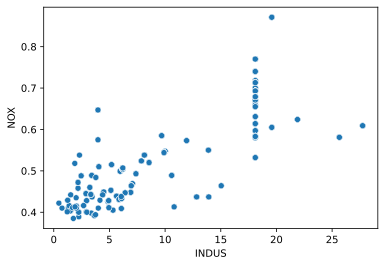

In [28]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 4))

sns.scatterplot(x='INDUS', y='NOX', data = df)
plt.show()

**Observations:**
- There higher the proportion of non-retail businesses in the town is, the higher is the level of NOX. This is expected. 
- There seem to be some outliers on the vertical line around INDUS ~ 18. This is probably due to some heavily polluting industrial objects in some towns with similar INDUS levels.  

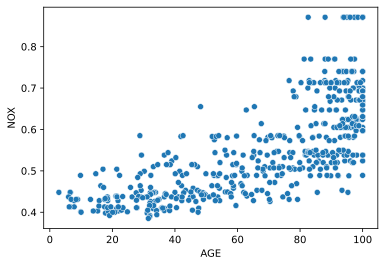

In [30]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 4))

sns.scatterplot(x='AGE', y='NOX', data=df)
plt.show()

**Observations:**
- The higher the proportion of the old houses the higher is the air pollution. It means that the older towns tend to be more industrial.
- There is also quite high variation at levels of INDUS at the AGE ~ 80 - 100, that means that non-retail busineses can have very different impact on air polutions depending on the objects.

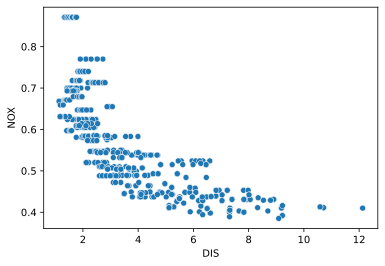

In [32]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 4))

sns.scatterplot(x='DIS', y='NOX', data=df)
plt.show()

**Observations:**
- The higher the distance to the employment centers the lower the level of NOX. Probably such towns are more isolated and located away from radial highways, which influences air pollution levels in a good way. 

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Splitting the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [42]:
# Let's separate the dependent variable and the indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Let's add the intercept term
X = sm.add_constant(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=1)

Next, let's check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

Let's use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Let's create a function to check the VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Let's calculate VIF for each of the feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [45]:
X_train = X_train.drop('TAX',axis=1)
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, let's create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

In [46]:
# Let's create the model
model1 = sm.OLS(y_train,X_train).fit()
#  And get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          1.40e-101
Time:                        16:23:03   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observations:**
- The adj. R2 seems quite good = 0.761. 
- p values of ZN, INDUS  and AGE are higher then 0.05. These variables are insignificant for the model. 
- Lets see if we can improve it by dropping insignificant variables. 

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero. 

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [48]:
# Let's create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(columns={'MEDV','MEDV_log','TAX','ZN','AGE','INDUS'})

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

model2 = sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Mon, 24 Apr 2023   Prob (F-statistic):          2.61e-104
Time:                        16:25:10   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, let's check the linear regression for meeting the fundamental assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [49]:
residuals = model2.resid

np.mean(residuals)

-5.584359089399869e-15

**Observations:**
- Mean residuals are very much close to 0. So this assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [50]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [51]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425283), ('p-value', 0.3019012006766869)]

**Observations:**
- p-value is higher than 0.05, so we can't reject the null hypothesis. That means that residuals are homoscedastic and the condition is satisfied. 

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

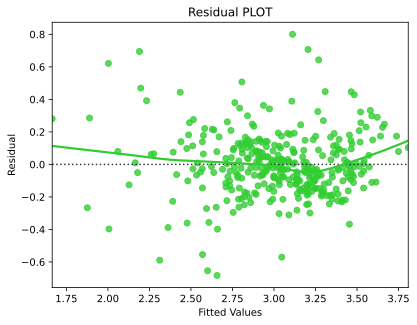

In [52]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "limegreen", lowess = True)

plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")

plt.show()

**Observations:**
- Residuals plot vs fitted plot is close to an uniform distribution. So this condition is satisfied.

### **4. Normality of error terms**

The residuals should be normally distributed.

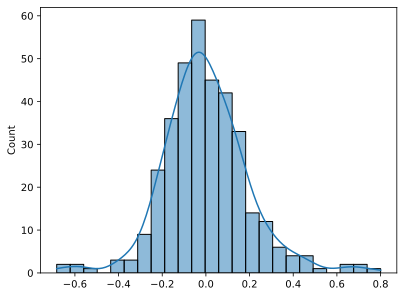

In [53]:
# Let's plot histogram of residuals
sns.histplot(residuals,kde=True);

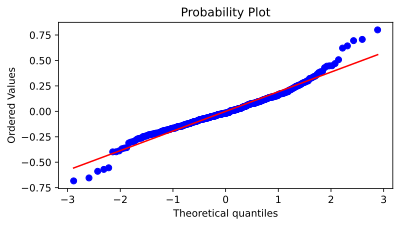

In [57]:
# Let's plot q-q plot of residuals
import pylab
import scipy.stats as stats

plt.figure(figsize=[6,3])
stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

- Residuals seem to be normally distributed. So the condition is satisfied. 

### **Let's check the performance of the model on the train and test data set**

In [58]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Let's check the model performance
model_pref(model2, X_train, X_test)  

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**
-  Train and test errors seem to be very close to each other. Test errors are just slightly higher than those of  train ones. The highest difference is ~ 5.5%, which means that the model is only slightly overfitting.

### **Let's apply cross validation to evaluate the model using different evaluation metrics**

In [69]:
# Let's import the required library
from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score1 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score2 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_root_mean_squared_error')                                  

# And Check the metrics
print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score1.mean(), cv_Score1.std() * 2))
print("Root Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score2.mean(), cv_Score2.std() * 2))

RSquared: 0.729 (+/- 0.232)
Root Mean Squared Error: 0.201 (+/- 0.060)


In [ ]:
df.reindex(df.B.abs().sort_values().index)

In [92]:
# Let's get the model parameters
coef = model2.params

# Create a df with the coefficients
coef_df = pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})
# And sort it by absolute values of the coefficients
coef_df=coef_df.reindex(coef_df.Coefs.abs().sort_values(ascending=False).index)
coef_df

,Feature,Coefs
0,const,4.649386
3,NOX,-1.056225
2,CHAS,0.119773
4,RM,0.058907
7,PTRATIO,-0.048504
5,DIS,-0.044069
8,LSTAT,-0.029277
1,CRIM,-0.012500
6,RAD,0.007848


In [93]:
# Let's write the equation of the fit
Equation = "log (Price) = "

print(Equation, end = '\t')

# And print the equation up to the last coef
for i in range(len(coef)-1):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

# Then add the last coef    
print('(', coef[len(coef)-1], ') * ', coef.index[len(coef)-1])

log (Price) = 	( 4.649385823266646 ) *  const + ( -0.012500455079103658 ) *  CRIM + ( 0.11977319077019757 ) *  CHAS + ( -1.056225351668324 ) *  NOX + ( 0.058906575109280324 ) *  RM + ( -0.044068890799405194 ) *  DIS + ( 0.007848474606243517 ) *  RAD + ( -0.04850362079499939 ) *  PTRATIO + ( -0.02927704047979673 ) *  LSTAT


In [99]:
features_by_importance = coef_df['Feature'][1:].to_list()
features_by_importance

['NOX', 'CHAS', 'RM', 'PTRATIO', 'DIS', 'LSTAT', 'CRIM', 'RAD']

**Conclusions and recommendations:**

- We recommend to use the derived regression equation for the prediction of the median house prices in the towns.
- The most important factor influencing the price is the NOX level.
- The CHAS, i. e. being near riverbank of Charles River is the second most important factor on the price.
- The features sorted from the most important to the least important are: 'NOX', 'CHAS', 'RM', 'PTRATIO', 'DIS', 'LSTAT', 'CRIM', 'RAD'